# Реализован алгоритм Грэхема-Коффмана без минимизации пересечений

In [2]:
!git clone https://github.com/Churilinavalentina/visualization_methods.git -b hw2

fatal: destination path 'visualization_methods' already exists and is not an empty directory.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_graphml('/content/visualization_methods/small_dag.graphml')       # Считываем файл

Nodes = list(G.nodes)            # Список вершин
Edges = list(G.edges)            # Список ребер
Parents = list(G.nodes)


/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:946: UserWarning: No key type for id d4. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:946: UserWarning: No key type for id d5. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:946: UserWarning: No key type for id d6. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:946: UserWarning: No key type for id d7. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:946: UserWarning: No key type for id d8. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:9

Задаем ширину графа

In [ ]:
W = 2

Построем графф по алгоритму Грехэма-Коффмана без дамми вершин

In [ ]:
#Зададим начальные значения пи. Если в вершину не входит ни одно ребро, присваиваем 0, 
#всем остальным в качестве бесконечности число, которое в 3 раза больше количества вершин.

pi = {}
dict_number = {}

for node in Nodes:
  a = 3*len(Nodes)
  pi[node]=[]
  # Ищем вершины, которые не имеют входящих ребер
  In = 0              
  for edge in Edges:              
    if edge[1] == node:
      In = In + 1 
      pi[node].append(a)                #Считаем сколько вершин входит в вершину

  if In == 0:                     #Если 0, то присваиваем пи = 0, иначе пи в 3 раза больше количества вершин
    a = 0
    pi[node].append(a)
  dict_number[node] = 0
max_len = 1


In [ ]:
# Функция, которая сортирует все пи по убыванию и считает максимальную длину пи

def sort_maxlen(pi):
  max_len = 0

  for i in pi:
    pi[i].sort(key=int, reverse=True)
    if len(pi[i])> max_len:
      max_len = len(pi[i])

  return pi, max_len

In [ ]:
# Функция, которая находит вершину с минимальным пи

def min_pi(Nodes, max_len, p, pi_copy):                   # p - это номер сравниваемого элемента пи
  min_pi_n = 4*len(Nodes)                                 #Изначально присвоем минимум как 4*на количество вершин

  for n in pi_copy:                                       #Проходим по всем элементам пи 

    if len(pi_copy[n])>=p+1 and pi_copy[n][p] < min_pi_n: #Сравниваем p-ый эменент в каждом пи и ищем минимальный

      min_pi_n = pi_copy[n][p]
    
  if len(pi_copy) < p+1:                                  #Если длина пи меньше, чем p+1, значит мы сравниваем элементы
                                                          #разной длины и в данном пи больше не осталось значений для сравнения.
      min_pi_n = 0                                        #значит минимум 0

  key_pi = list(pi_copy.keys())
                                                          #Удаляем элемент из pi_copy, если его значение больше максимума
  for n in key_pi:
    if len(pi_copy[n]) >= p+1 and pi_copy[n][p] > min_pi_n:
      del pi_copy[n]
 
  if p < max_len-1 and len(pi_copy)>1:                    #Если p меньше максимальной длины и в pi_copy осталось 
                                                          #больше 1 пи, запускаем функцию еще раз
    p = p + 1
    return min_pi(pi, max_len, p, pi_copy)
  
  return list(pi_copy.keys())


In [ ]:
# Функция, которая обновляет статус pi

def new_pi(node_number, i, Edges, pi, Nodes):
  for edge in Edges:
    if edge[0] == node_number[0]:                   # node_number - вершина, которую выдает функция min_pi.
      if pi[edge[1]][0] == 3*len(Nodes):
        pi[edge[1]][0] = i                          # Добавляем всем исходящим из node_number номер этой вершины в пи
      else:
       print('folse')
  return pi

In [ ]:
# Цикл, который присваивает номера вершинам, используя предыдущие функции. Номера вершин записываются в dict_number
i = 0

for i in range(len(Nodes)):
  pi, max_len = sort_maxlen(pi)
  pi_copy = pi.copy()
  p=0
  node_number = min_pi(Nodes, max_len, p, pi_copy)
  dict_number[node_number[0]] = i
  del pi[node_number[0]]
  pi = new_pi(node_number, i, Edges, pi, Nodes)
  i = i+1

In [ ]:
# Создание словаря с дочерними вершинами, понадобится для оптимизации проверки (стоят ли дочернии вершины на более низких уровнях)
pos = {}
Y = 0
daughter = {}
copy_d = {}
for node in Nodes:
  daughter[node] = []
  copy_d[node] = []
  for edge in Edges:
    if edge[0] == node:
      daughter[node].append(edge[1])
      copy_d[node].append(edge[1])

In [ ]:
# Цикл, который присваивает координаты вершинам.
while len(pos) < len(Nodes):
    X = 0
    for x in range(W):
      max_number = 0
      for node_number in dict_number:
        if dict_number[node_number] >= max_number:
          if len(daughter[node_number]) == 0: 
              max_number = dict_number[node_number]
              node_numb = node_number
          else:
            for node_d in range(len(copy_d[node_number])):
            
              if daughter[node_number][node_d] in pos.keys():
                copy_d[node_number][node_d] = pos[daughter[node_number][node_d]][1]
              else:
                copy_d[node_number][node_d] = 3*len(Nodes)
       
            if max(copy_d[node_number]) < Y:
              max_number = dict_number[node_number]
              node_numb = node_number

      if node_numb in dict_number.keys():
        del dict_number[node_numb]
        pos[node_numb] = [X,Y]
      else:
        break
      X = X+1
    Y = Y+1

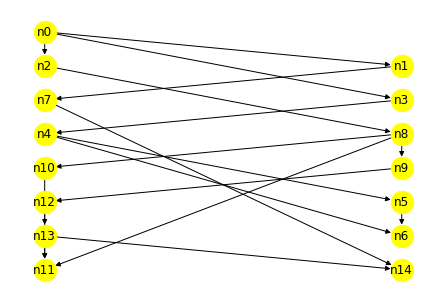

In [ ]:
nx.draw(G, pos = pos, node_color='yellow', arrows=True, node_size = 500, with_labels=True)

plt.show()

Добавление дамми вершин

In [ ]:
#Добавление дамми вершин и расчет их уровней (координаты Х)
for edge in Edges:
  N = pos[edge[0]][1]-pos[edge[1]][1]-1
  print(edge, pos[edge[0]], pos[edge[1]])
  dummy_node_back = edge[0]

  for dummy in range(1,N+1):
    dummy_node = 'dummy'+edge[0]+edge[1]+str(dummy)
    pos[dummy_node]=[0,pos[edge[0]][1]-dummy]
    G.add_node(dummy_node)
    G.add_edge(dummy_node_back,dummy_node)
    dummy_node_back = dummy_node

  G.add_edge(dummy_node_back, edge[1])

  if N > 0:
    G.remove_edge(edge[0], edge[1])

print(pos)
# Count_node_l = 0
# for node in pos:

('n0', 'n1') [0, 7] [1, 6]
('n0', 'n2') [0, 7] [0, 6]
('n0', 'n3') [0, 7] [1, 5]
('n1', 'n7') [1, 6] [0, 5]
('n2', 'n8') [0, 6] [1, 4]
('n3', 'n4') [1, 5] [0, 4]
('n4', 'n5') [0, 4] [1, 2]
('n4', 'n6') [0, 4] [1, 1]
('n5', 'n6') [1, 2] [1, 1]
('n7', 'n14') [0, 5] [1, 0]
('n8', 'n9') [1, 4] [1, 3]
('n8', 'n10') [1, 4] [0, 3]
('n8', 'n11') [1, 4] [0, 0]
('n9', 'n12') [1, 3] [0, 2]
('n10', 'n11') [0, 3] [0, 0]
('n12', 'n13') [0, 2] [0, 1]
('n13', 'n11') [0, 1] [0, 0]
('n13', 'n14') [0, 1] [1, 0]
{'n11': [0, 0], 'n14': [1, 0], 'n13': [0, 1], 'n6': [1, 1], 'n12': [0, 2], 'n5': [1, 2], 'n10': [0, 3], 'n9': [1, 3], 'n4': [0, 4], 'n8': [1, 4], 'n7': [0, 5], 'n3': [1, 5], 'n2': [0, 6], 'n1': [1, 6], 'n0': [0, 7], 'dummyn0n31': [0, 6], 'dummyn2n81': [0, 5], 'dummyn4n51': [0, 3], 'dummyn4n61': [0, 3], 'dummyn4n62': [0, 2], 'dummyn7n141': [0, 4], 'dummyn7n142': [0, 3], 'dummyn7n143': [0, 2], 'dummyn7n144': [0, 1], 'dummyn8n111': [0, 3], 'dummyn8n112': [0, 2], 'dummyn8n113': [0, 1], 'dummyn10n111':

In [ ]:
#Считаем сколько вершин на каждом уровне
levels  = [pos[k][1] for k in pos]
import numpy as np
levels_stats = {l:[k,0] for l,k in zip(*np.unique(levels, return_counts=True))}

In [ ]:
#Определяем координаты по Х
for node in pos:
  pos[node][0] = W* levels_stats[pos[node][1]][1]/levels_stats[pos[node][1]][0]
  levels_stats[pos[node][1]][1] +=1

In [ ]:
#Создаем список с размером вершин и словарь с названиями для отрисовки
node_sizes = list()
labels = dict()
for n in G.nodes:
  if n.find('dummy') >= 0:
    node_sizes.append(0)
    labels[n] = ''
  else:
    node_sizes.append(500)
    labels[n] = n

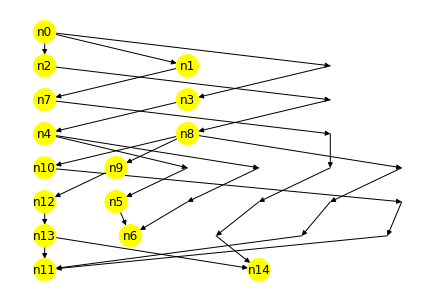

In [ ]:
nx.draw(G, pos = pos, node_color='yellow', arrows=True, node_size = node_sizes, with_labels=False)
nx.draw_networkx_labels(G,pos,labels)
plt.show()